In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
#data = pd.read_csv('data/Volcano.csv')
data = pd.read_csv('data/The_Volcanoes_Of_Earth.csv')

Data Source: https://www.kaggle.com/datasets/deepcontractor/the-volcanoes-of-earth

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,Volcano_Name,Volcano_Image,Volcano_Type,Country,Region,Subregion,epoch_period,Last_Eruption,Summit_and_Elevatiuon,Latitude,Longitude,population_within_5km,population_within_10km,population_within_30km,population_within_100km
0,Abu,https://volcano.si.edu/gallery/photos/GVP-0895...,Shield(s),Japan,"Japan, Taiwan, Marianas",Honshu,holocene,6850 BCE,"641 m, 2103 ft",34.5°N,131.6°E,3597.0,9594.0,117805.0,4071152.0
1,Acamarachi,https://volcano.si.edu/gallery/photos/GVP-0688...,Stratovolcano,Chile,South America,"Northern Chile, Bolivia and Argentina",holocene,Unknown - Evidence Credible,"6023 m, 19760 ft",23.292°S,67.618°W,0.0,7.0,294.0,9092.0
2,Acatenango,https://volcano.si.edu/gallery/photos/GVP-0788...,Stratovolcano(es),Guatemala,México and Central America,Guatemala,holocene,1972 CE,"3976 m, 13045 ft",14.501°N,90.876°W,4329.0,60730.0,1042836.0,7634778.0
3,Acigol-Nevsehir,https://volcano.si.edu/includes/images/noimage...,Caldera,Turkey,Mediterranean and Western Asia,Turkey,holocene,2080 BCE,"1683 m, 5522 ft",38.537°N,34.621°E,127863.0,127863.0,218469.0,2253483.0
4,Adams,https://volcano.si.edu/gallery/photos/GVP-0281...,Stratovolcano,United States,Canada and Western USA,USA (Washington),holocene,950 CE,"3742 m, 12277 ft",46.206°N,121.49°W,0.0,70.0,4019.0,393303.0


# EDA (Exploratory Data Analysis)

In [4]:
data['Country'].unique()

array(['Japan', 'Chile', 'Guatemala', 'Turkey', 'United States',
       'Undersea Features', 'Ethiopia', 'Portugal', 'Indonesia', 'Russia',
       'Ecuador', 'Eritrea', 'Canada', 'Vanuatu', 'Philippines',
       'Papua New Guinea', 'Madagascar', 'France', 'Peru', 'Antarctica',
       'Argentina', 'El Salvador', 'Nicaragua', 'Armenia', 'Djibouti',
       'Costa Rica', 'Yemen', 'China', 'United Kingdom', 'Iceland',
       'Algeria', 'Mexico', 'New Zealand', 'Colombia', 'India', 'Kenya',
       'Panama', 'Sudan', 'Iran', 'Saudi Arabia', 'Norway', 'Cape Verde',
       'Uganda', 'Spain', 'Cameroon', 'Italy', 'Vietnam', 'North Korea',
       'Solomon Islands', 'Tonga', 'Mongolia', 'Dominica', 'Comoros',
       'South Korea', 'Syria', 'Australia', 'Tanzania', 'Bolivia',
       'DR Congo', 'Georgia', 'Grenada', 'Fiji', 'Chad', 'Taiwan',
       'Saint Kitts and Nevis', 'South Africa', 'Greece',
       'Burma (Myanmar)', 'Saint Lucia', 'Netherlands',
       'Equatorial Guinea', 'Samoa', 'Saint V

In [5]:
data['Volcano_Type'].unique()

array(['Shield(s)', 'Stratovolcano', 'Stratovolcano(es)', 'Caldera',
       'Submarine', 'Shield', 'Volcanic field', 'Fissure vent(s)',
       'Compound', 'Complex', 'Pyroclastic shield', 'Pyroclastic cone(s)',
       'Pyroclastic cone', 'Maar', 'Caldera(s)', 'Lava dome(s)',
       'Lava cone', 'Maar(s)', 'Crater rows', 'Tuff ring(s)',
       'Tuff cone(s)', 'Explosion crater(s)', 'Complex(es)', 'Lava dome',
       'Fissure vent', 'Subglacial', 'Cone(s)', 'Tuff cone',
       'Stratovolcano?', 'Lava cone(s)', 'Lava cone(es)', 'Submarine(es)',
       'Cone', 'Unknown', 'Lava dome(s) ?', 'Tuya', 'Explosion crater',
       'Shield?', 'Volcanic remnant', 'Fissure vent(s) ?',
       'Explosion crater(?)', 'Caldera(?)'], dtype=object)

In [6]:
data['Volcano_Type'].unique()

array(['Shield(s)', 'Stratovolcano', 'Stratovolcano(es)', 'Caldera',
       'Submarine', 'Shield', 'Volcanic field', 'Fissure vent(s)',
       'Compound', 'Complex', 'Pyroclastic shield', 'Pyroclastic cone(s)',
       'Pyroclastic cone', 'Maar', 'Caldera(s)', 'Lava dome(s)',
       'Lava cone', 'Maar(s)', 'Crater rows', 'Tuff ring(s)',
       'Tuff cone(s)', 'Explosion crater(s)', 'Complex(es)', 'Lava dome',
       'Fissure vent', 'Subglacial', 'Cone(s)', 'Tuff cone',
       'Stratovolcano?', 'Lava cone(s)', 'Lava cone(es)', 'Submarine(es)',
       'Cone', 'Unknown', 'Lava dome(s) ?', 'Tuya', 'Explosion crater',
       'Shield?', 'Volcanic remnant', 'Fissure vent(s) ?',
       'Explosion crater(?)', 'Caldera(?)'], dtype=object)

In [7]:
# Need to find a better way to do this

data.loc[data['Volcano_Type'] == 'Shield(s)', 'Volcano_Type'] = 'Shield'
data.loc[data['Volcano_Type'] == 'Stratovolcano(es)', 'Volcano_Type'] = 'Stratovolcano'
data.loc[data['Volcano_Type'] == 'Pyroclastic cone(s)', 'Volcano_Type'] = 'Pyroclastic cone'
data.loc[data['Volcano_Type'] == 'Caldera(s)', 'Volcano_Type'] = 'Caldera'
data.loc[data['Volcano_Type'] == 'Lava dome(s)', 'Volcano_Type'] = 'Lava dome'
data.loc[data['Volcano_Type'] == 'Maar(s)', 'Volcano_Type'] = 'Maar'
data.loc[data['Volcano_Type'] == 'Tuff ring(s)', 'Volcano_Type'] = 'Tuff ring'
data.loc[data['Volcano_Type'] == 'Tuff cone(s)', 'Volcano_Type'] = 'Tuff cone'
data.loc[data['Volcano_Type'] == 'Explosion crater(s)', 'Volcano_Type'] = 'Explosion crater'
data.loc[data['Volcano_Type'] == 'Complex(es)', 'Volcano_Type'] = 'Complex'
data.loc[data['Volcano_Type'] == 'Cone(s)', 'Volcano_Type'] = 'Cone'
data.loc[data['Volcano_Type'] == 'Stratovolcano?', 'Volcano_Type'] = 'Stratovolcano'
data.loc[data['Volcano_Type'] == 'Lava cone(s)', 'Volcano_Type'] = 'Lava cone'
data.loc[data['Volcano_Type'] == 'Submarine(es)', 'Volcano_Type'] = 'Submarine'
data.loc[data['Volcano_Type'] == 'Lava dome(s) ?', 'Volcano_Type'] = 'Lava dome'
data.loc[data['Volcano_Type'] == 'Shield?', 'Volcano_Type'] = 'Shield'
data.loc[data['Volcano_Type'] == 'Fissure vent(s) ?', 'Volcano_Type'] = 'Fissure vent'
data.loc[data['Volcano_Type'] == 'Explosion crater(?)', 'Volcano_Type'] = 'Explosion crater'
data.loc[data['Volcano_Type'] == 'Caldera(?)', 'Volcano_Type'] = 'Caldera'
data.loc[data['Volcano_Type'] == 'Lava cone(es)', 'Volcano_Type'] = 'Lava cone'
data.loc[data['Volcano_Type'] == 'Fissure vent(s)', 'Volcano_Type'] = ' Fissure vent'


In [8]:
data['Volcano_Type'].unique()

array(['Shield', 'Stratovolcano', 'Caldera', 'Submarine',
       'Volcanic field', ' Fissure vent', 'Compound', 'Complex',
       'Pyroclastic shield', 'Pyroclastic cone', 'Maar', 'Lava dome',
       'Lava cone', 'Crater rows', 'Tuff ring', 'Tuff cone',
       'Explosion crater', 'Fissure vent', 'Subglacial', 'Cone',
       'Unknown', 'Tuya', 'Volcanic remnant'], dtype=object)

In [9]:
px.histogram(data, x='Country', color='Volcano_Type')

In [12]:
iceland = data[data['Country'] == 'Iceland']
spain = data[data['Country'] == 'Spain']

In [13]:
spain

,Volcano_Name,Volcano_Image,Volcano_Type,Country,Region,Subregion,epoch_period,Last_Eruption,Summit_and_Elevatiuon,Latitude,Longitude,population_within_5km,population_within_10km,population_within_30km,population_within_100km
182,Calatrava Volcanic Field,https://volcano.si.edu/gallery/photos/GVP-1185...,Pyroclastic cone,Spain,Mediterranean and Western Asia,Western Europe,holocene,3600 BCE,"1117 m, 3665 ft",38.87°N,4.02°W,197199.0,197199.0,197199.0,774386.0
366,Fuerteventura,https://volcano.si.edu/gallery/photos/GVP-1041...,Fissure vent,Spain,Atlantic Ocean,Canary Islands,holocene,Unknown - Evidence Credible,"529 m, 1736 ft",28.358°N,14.02°W,1432.0,8752.0,52038.0,226781.0
400,Gran Canaria,https://volcano.si.edu/gallery/photos/GVP-0889...,Fissure vent,Spain,Atlantic Ocean,Canary Islands,holocene,40 CE,"1950 m, 6398 ft",28°N,15.58°W,1101.0,8049.0,697199.0,1119998.0
445,Hierro,https://volcano.si.edu/gallery/photos/GVP-0875...,Shield,Spain,Atlantic Ocean,Canary Islands,holocene,2012 CE,"1500 m, 4921 ft",27.73°N,18.03°W,20321.0,20321.0,20321.0,43696.0
635,La Palma,https://volcano.si.edu/gallery/photos/GVP-0875...,Stratovolcano,Spain,Atlantic Ocean,Canary Islands,holocene,2021 CE,"2426 m, 7959 ft",28.57°N,17.83°W,442.0,18506.0,55922.0,85416.0
642,Lanzarote,https://volcano.si.edu/gallery/photos/GVP-0873...,Fissure vent,Spain,Atlantic Ocean,Canary Islands,holocene,1824 CE,"670 m, 2198 ft",29.03°N,13.63°W,19033.0,80515.0,164123.0,225373.0
861,Olot Volcanic Field,https://volcano.si.edu/gallery/photos/GVP-1199...,Pyroclastic cone,Spain,Mediterranean and Western Asia,Western Europe,holocene,Unknown - Evidence Credible,"893 m, 2930 ft",42.17°N,2.53°E,33377.0,33377.0,101153.0,5238117.0
1167,Tenerife,https://volcano.si.edu/gallery/photos/GVP-0889...,Stratovolcano,Spain,Atlantic Ocean,Canary Islands,holocene,1909 CE,"3715 m, 12188 ft",28.271°N,16.641°W,0.0,156.0,337660.0,766276.0
1555,Cofrentes,https://volcano.si.edu/includes/images/noimage...,Volcanic field,Spain,Volcanic Region,Western Europe,pleistocene,Pleistocene,"514 m, 1686 ft",39.235°N,1.064°W,NaN,NaN,NaN,NaN
1559,"Columbretes, Islas",https://volcano.si.edu/includes/images/noimage...,Volcanic field,Spain,Volcanic Region,Western Europe,pleistocene,Pleistocene,"33 m, 108 ft",39.896°N,0.686°E,2738.0,50749.0,231112.0,2528256.0


ValueError: could not convert string to float: 'Calatrava Volcanic Field'

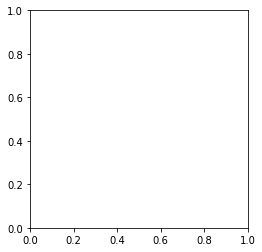

In [20]:
keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(spain, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [ ]:
# To see the country with most volcanoes I check the count occurrence in the Country column
occur = data.groupby(['Country']).size()
display(occur.sort_values(ascending = False))

print(type(occur))

In [ ]:
df = occur.to_frame()
volcanoes = pd.merge(data, df, on = "Country", how = "inner")

In [ ]:
fig = px.pie(data, values='', names='day')
fig.show()

In [ ]:
# Submarine volcanoes by country
